# <u>**ENGR 418 - PROJECT STAGE 1**</u>
## Group: 12
## Drayton Monkman, 53------
## Spencer Szabo, 23------
## November 16, 2021

Testing against training data...
Confusion matrix: 
col_0  0.0  1.0  2.0
row_0               
0.0     27    0    0
1.0      0   27    0
2.0      0    0   27
Accuracy Score: 1.0
Plotting weights:
Intercept:  [ 1.14639336e-02 -9.25339363e+01  6.05831595e+01]
Class 0 (cir) weights: 


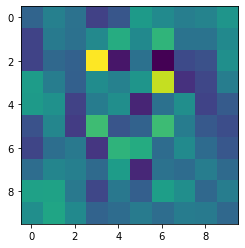

Class 1 (rec) weights: 


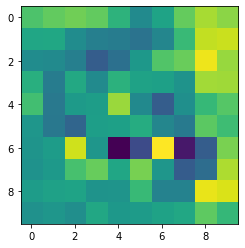

Class 2 (squ) weights: 


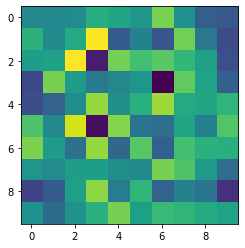

[[119. 124. 128. ... 164. 166. 168.]
 [122. 126. 130. ... 166. 168. 169.]
 [152. 157. 162. ... 182. 184. 186.]
 ...
 [125. 127. 129. ... 206. 205. 204.]
 [158. 163. 168. ... 213. 214. 217.]
 [186. 189. 192. ... 228. 230. 231.]]


In [5]:
'''
MODEL TRAINING:
    The function 'TrainLinearModel' will train a model that can detect shapes based on a given training directory. 
    
    It does this by:
    a) Loading a list of training data from the 'Lego_dataset_2/training' directory
    b) Iterating through each image to perform the following:
        1. Loading training image
        2. Cropping (centered at the center of the original image)
        3. Resizing to LxL pixels (choose L)
        4. Vectorizing the image
        5. Determining true class based on filenames (for training purposes only)
    c) Training a logistic regression model using sklearn.linear_model.LogisticRegression
    
    The function is then called once at the end of this cell and will print a classification report of the model tested against the training data.
'''

# Import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from PIL import Image

def TrainLinearModel(path="Lego_dataset_2/training", L=10, max_iter=1000, test_training_data=True, plot_weights=True):
    '''
    Parameters:
         path (str): Default 'Lego_dataset_2/training' relative to working directory. Path to the directy of data used for training.
        L (int): Default 10. Training resolution of our model. X will contain L^2 values. Lower values provide faster training but retain less raw image data.
        max_iter (int): Default 1000. Maximum number of iterations allowable. Lower values may provide faster training would also result failure to converge if the limit is reached.
        test_training_data (bool): Default True. If true, test against training data. This will print a classification report and accuracy indicator.
        plot_weights (bool): Default True. If true, plot weights in the form of an image. This will give a visual representation of what the model is looking for during classification.
        
    Returns:
        log_regress (sklearn.linear_model)
    '''
    
    # Get all files in the given path
    filenames = os.listdir(path) 
    
    # Specify classes
    classes = ['0', '1', '2']
    
    # Initialize empty X array; # of files by Y^2 pixels
    X = np.empty((len(filenames), L*L)) 
    
    # Initialize empty y array
    y = np.empty(len(filenames)) 
    
    # Iterate through all files
    for i in range(len(filenames)):
        # 1. Load training images
        file_path = path + '/' + filenames[i]
        img = Image.open(file_path).convert('L')
        
        # 2. Crop (centered at the center of the original image)
        w, h = img.size
        side = min(w, h)
        img = img.crop((w/2 - side/2, h/2 - side/2, w/2 + side/2, h/2 + side/2))

        # 3. Resize to LxL pixels (choose L)
        img_LxL = img.resize((L, L))
        
        # 4. Vectorize image
        img_arr = np.asarray(img_LxL)
        
        # Store into X array
        X[i,:] = img_arr.ravel().reshape(1, -1)

        # Determing class based on filename (for training purposes only)
        classname = filenames[i][0:3]
        if classname == 'cir': 
            y[i] = classes[0]
        elif classname == 'rec': 
            y[i] = classes[1]
        elif classname == 'squ': 
            y[i] = classes[2]
        else:
            raise RuntimeError("Error classifying images: All training image filenames must begin with either 'cir', 'rec', or 'squ'")
            
    # 5. Train logistic regression model using one-vs-rest (aka one-vs-all)
    log_regress = linear_model.LogisticRegression(max_iter=max_iter, multi_class='ovr')
    log_regress.fit(X,y)
    
    # Show confusion matrix against training data if test_training_data is true
    if(test_training_data):
        print("Testing against training data...")
   
        # Use the model to predict the training data using our model
        prediction = log_regress.predict(X)

        # Show the confusion matrix against training data. Should be close to perfect.
        print("Confusion matrix: ")
        print(pd.crosstab(y, prediction))
        
        # Show accuracy score. Should be close to perfect.
        print(f"Accuracy Score: {str(accuracy_score(y, prediction))}")

    # Plot image weights if plot_weights is true
    if(plot_weights):
        print('Plotting weights:')
        print('Intercept: ', log_regress.intercept_)
        
        # Plot the weight for each class
        for i in range(len(classes)):
            names = ['cir','rec','squ']
            print(f'Class {i} ({names[i]}) weights: ')
            coef_Matrix = np.reshape(log_regress.coef_[i], (L, L))
            plt.imshow(coef_Matrix)
            plt.show()
    print(X)
    # Return the model for further use
    return log_regress

# Calling the training function alone. Change L to see the resolution change
model = TrainLinearModel(L=10, max_iter=10000)

C:\Users\draym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\draym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Testing against training data...
Confusion matrix: 
col_0  0.0  1.0  2.0
row_0               
0.0     27    0    0
1.0      0   27    0
2.0      0    0   27
Accuracy Score: 1.0

Using model to predict testing data...
class_pred = 2 (squ)
class_true = 0 (cir)
class probabilities =  [[1.03704256e-21 1.35597349e-04 9.99864403e-01]]


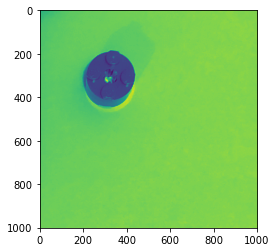

class_pred = 0 (cir)
class_true = 0 (cir)
class probabilities =  [[0.94397245 0.03921662 0.01681093]]


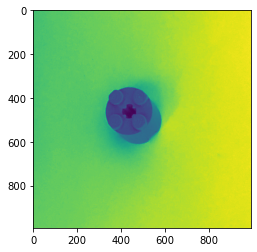

class_pred = 0 (cir)
class_true = 0 (cir)
class probabilities =  [[9.99961766e-01 5.12147379e-07 3.77220895e-05]]


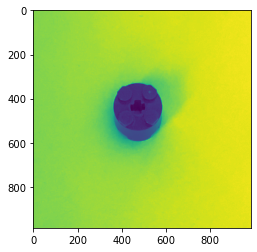

class_pred = 2 (squ)
class_true = 0 (cir)
class probabilities =  [[4.70672388e-01 6.07272623e-06 5.29321539e-01]]


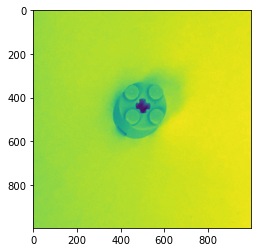

class_pred = 0 (cir)
class_true = 0 (cir)
class probabilities =  [[9.59879760e-01 4.89369353e-06 4.01153464e-02]]


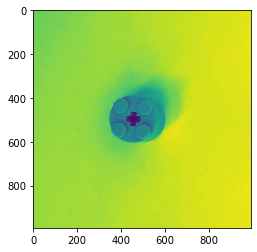

class_pred = 0 (cir)
class_true = 0 (cir)
class probabilities =  [[9.99952374e-01 8.99429053e-08 4.75358320e-05]]


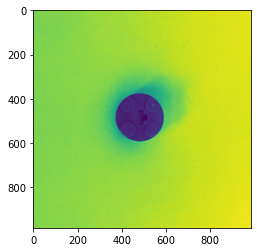

class_pred = 0 (cir)
class_true = 0 (cir)
class probabilities =  [[9.99830818e-01 4.65198934e-09 1.69177584e-04]]


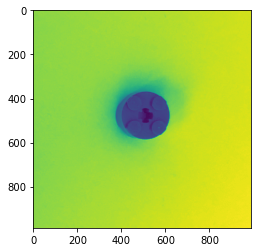

class_pred = 0 (cir)
class_true = 0 (cir)
class probabilities =  [[9.81755359e-01 3.38143531e-09 1.82446375e-02]]


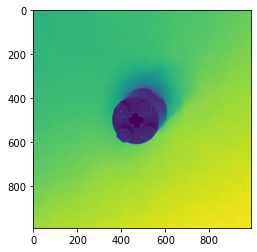

class_pred = 1 (rec)
class_true = 0 (cir)
class probabilities =  [[0.32218938 0.65849162 0.019319  ]]


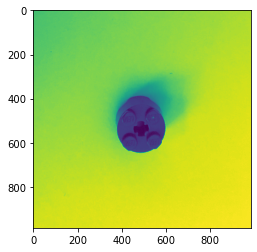

class_pred = 2 (squ)
class_true = 0 (cir)
class probabilities =  [[4.56875121e-01 6.62925269e-08 5.43124812e-01]]


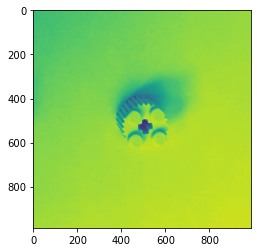

class_pred = 2 (squ)
class_true = 0 (cir)
class probabilities =  [[0.09513827 0.00121058 0.90365115]]


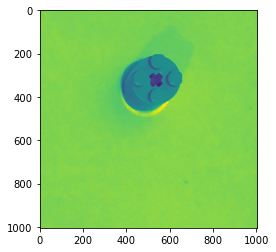

class_pred = 1 (rec)
class_true = 0 (cir)
class probabilities =  [[4.96973488e-21 5.80660817e-01 4.19339183e-01]]


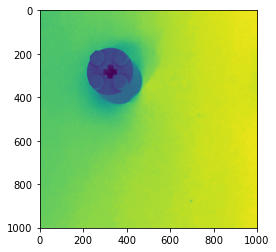

class_pred = 0 (cir)
class_true = 0 (cir)
class probabilities =  [[7.44624199e-01 2.55375800e-01 6.54888748e-10]]


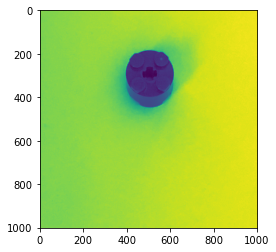

class_pred = 2 (squ)
class_true = 0 (cir)
class probabilities =  [[0.45966848 0.00914487 0.53118666]]


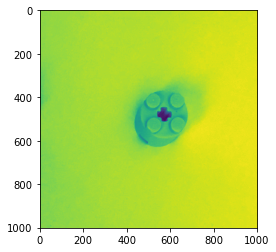

class_pred = 1 (rec)
class_true = 0 (cir)
class probabilities =  [[8.99557601e-06 9.98437893e-01 1.55311114e-03]]


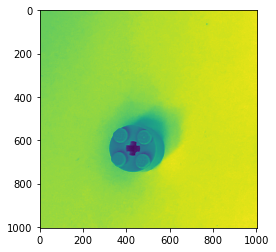

class_pred = 2 (squ)
class_true = 0 (cir)
class probabilities =  [[2.06823788e-08 4.99668663e-01 5.00331316e-01]]


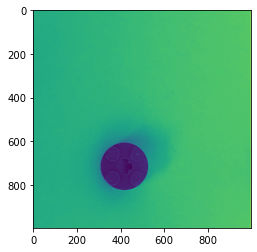

class_pred = 1 (rec)
class_true = 0 (cir)
class probabilities =  [[1.10497775e-13 9.99980837e-01 1.91630232e-05]]


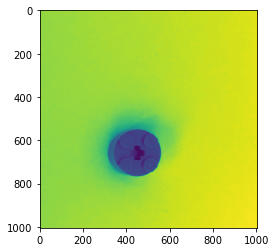

class_pred = 0 (cir)
class_true = 0 (cir)
class probabilities =  [[9.72652391e-01 9.77059560e-07 2.73466324e-02]]


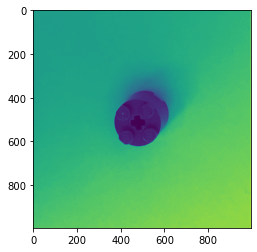

class_pred = 0 (cir)
class_true = 0 (cir)
class probabilities =  [[9.99999886e-01 4.43711147e-12 1.14381341e-07]]


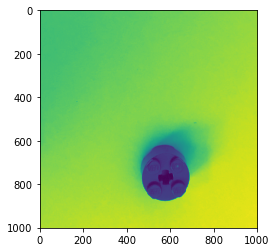

class_pred = 0 (cir)
class_true = 0 (cir)
class probabilities =  [[6.59145853e-01 4.33174839e-05 3.40810829e-01]]


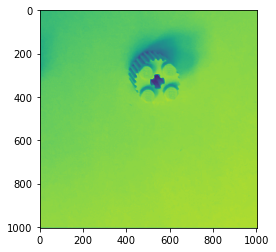

class_pred = 0 (cir)
class_true = 0 (cir)
class probabilities =  [[9.99997592e-01 7.49722571e-15 2.40827519e-06]]


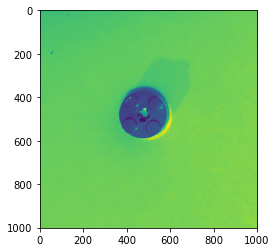

class_pred = 1 (rec)
class_true = 0 (cir)
class probabilities =  [[1.99880814e-07 9.99930850e-01 6.89500901e-05]]


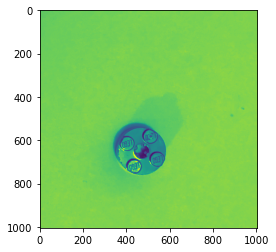

class_pred = 2 (squ)
class_true = 0 (cir)
class probabilities =  [[3.66581256e-12 6.01761521e-12 1.00000000e+00]]


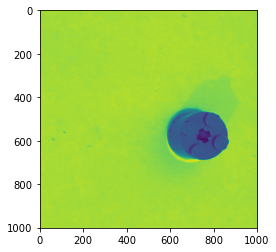

class_pred = 0 (cir)
class_true = 0 (cir)
class probabilities =  [[9.99984843e-01 8.45084428e-15 1.51566051e-05]]


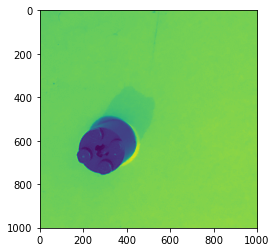

class_pred = 2 (squ)
class_true = 0 (cir)
class probabilities =  [[4.49670739e-01 3.54777698e-05 5.50293783e-01]]


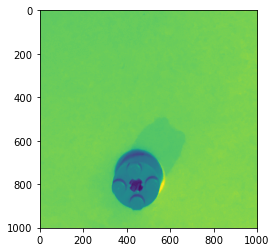

class_pred = 2 (squ)
class_true = 0 (cir)
class probabilities =  [[1.16653570e-05 5.36060164e-03 9.94627733e-01]]


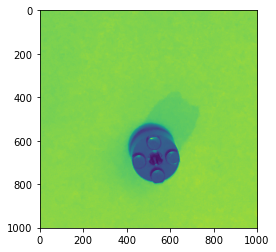

class_pred = 1 (rec)
class_true = 0 (cir)
class probabilities =  [[0.00245548 0.98962021 0.00792431]]


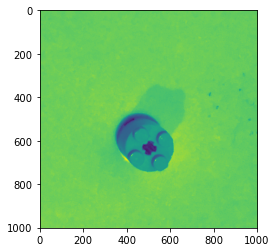

class_pred = 0 (cir)
class_true = 1 (rec)
class probabilities =  [[9.99890146e-01 1.09853673e-04 1.21140049e-11]]


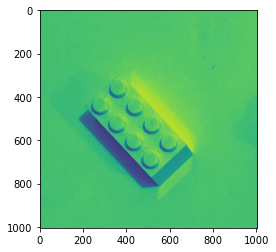

class_pred = 2 (squ)
class_true = 1 (rec)
class probabilities =  [[1.57192892e-07 1.88569356e-01 8.11430487e-01]]


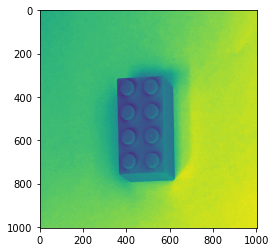

class_pred = 1 (rec)
class_true = 1 (rec)
class probabilities =  [[1.43541010e-21 1.00000000e+00 4.73681141e-10]]


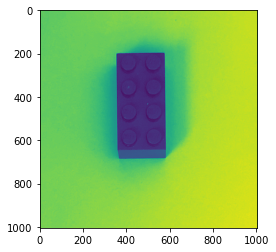

class_pred = 1 (rec)
class_true = 1 (rec)
class probabilities =  [[5.97803962e-18 9.99998044e-01 1.95614855e-06]]


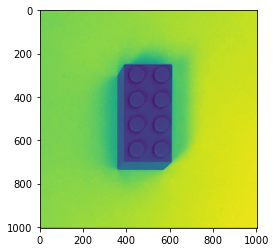

class_pred = 2 (squ)
class_true = 1 (rec)
class probabilities =  [[2.67648261e-15 4.99909514e-01 5.00090486e-01]]


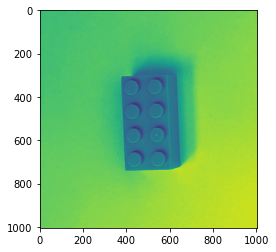

class_pred = 1 (rec)
class_true = 1 (rec)
class probabilities =  [[2.01378020e-15 9.99999992e-01 7.95792184e-09]]


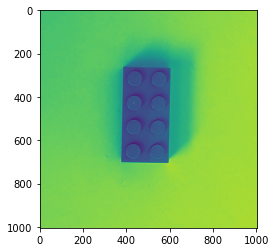

class_pred = 1 (rec)
class_true = 1 (rec)
class probabilities =  [[7.38157095e-23 5.00025124e-01 4.99974876e-01]]


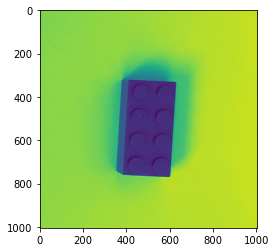

class_pred = 1 (rec)
class_true = 1 (rec)
class probabilities =  [[1.98933191e-19 5.87970565e-01 4.12029435e-01]]


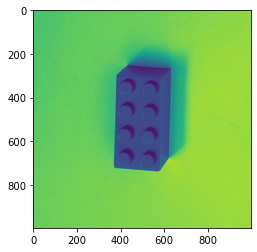

class_pred = 1 (rec)
class_true = 1 (rec)
class probabilities =  [[9.25734963e-25 9.99833384e-01 1.66616310e-04]]


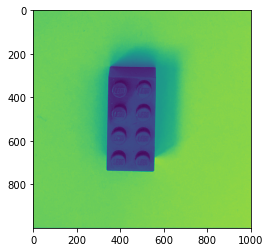

class_pred = 1 (rec)
class_true = 1 (rec)
class probabilities =  [[2.82561542e-07 9.99999548e-01 1.69004124e-07]]


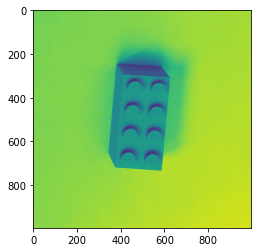

class_pred = 1 (rec)
class_true = 1 (rec)
class probabilities =  [[6.65298501e-18 9.99999998e-01 1.55348780e-09]]


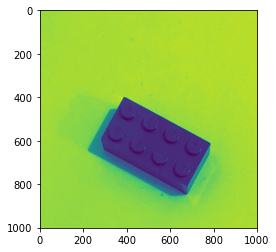

class_pred = 1 (rec)
class_true = 1 (rec)
class probabilities =  [[2.65885620e-10 1.00000000e+00 4.80216517e-11]]


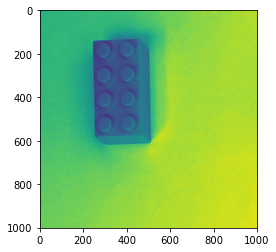

class_pred = 1 (rec)
class_true = 1 (rec)
class probabilities =  [[1.43820270e-16 9.97139709e-01 2.86029149e-03]]


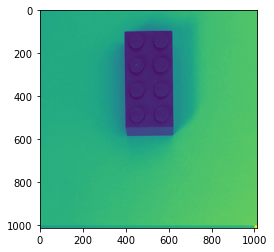

class_pred = 1 (rec)
class_true = 1 (rec)
class probabilities =  [[2.08829724e-12 9.99999993e-01 6.80246572e-09]]


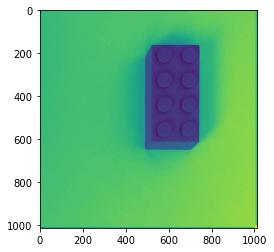

class_pred = 1 (rec)
class_true = 1 (rec)
class probabilities =  [[8.46128525e-18 9.98991351e-01 1.00864882e-03]]


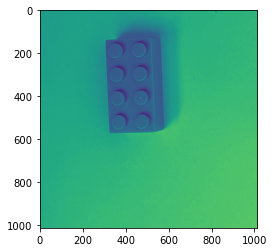

class_pred = 1 (rec)
class_true = 1 (rec)
class probabilities =  [[1.19776507e-08 9.99999988e-01 1.08678640e-14]]


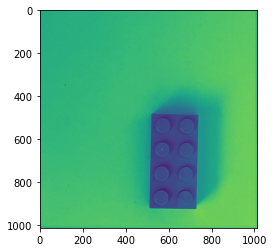

class_pred = 0 (cir)
class_true = 1 (rec)
class probabilities =  [[1.00000000e+00 2.19381341e-17 4.32845631e-30]]


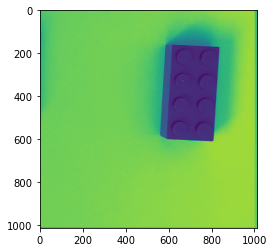

class_pred = 1 (rec)
class_true = 1 (rec)
class probabilities =  [[1.82534469e-17 5.00001640e-01 4.99998360e-01]]


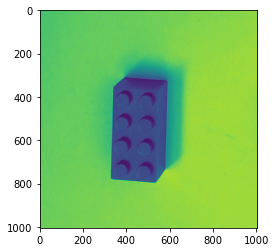

class_pred = 1 (rec)
class_true = 1 (rec)
class probabilities =  [[4.32307090e-09 9.83787043e-01 1.62129524e-02]]


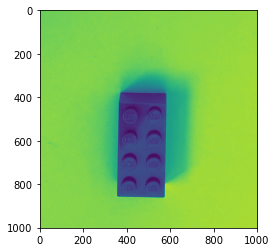

class_pred = 2 (squ)
class_true = 1 (rec)
class probabilities =  [[2.47130252e-15 5.92846704e-02 9.40715330e-01]]


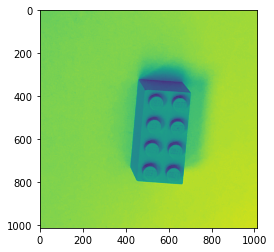

class_pred = 2 (squ)
class_true = 1 (rec)
class probabilities =  [[2.64525284e-09 4.99820197e-01 5.00179800e-01]]


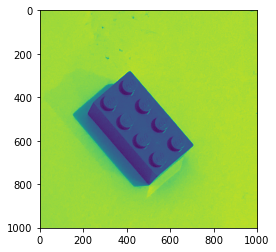

class_pred = 0 (cir)
class_true = 1 (rec)
class probabilities =  [[9.99675839e-01 3.24160989e-04 1.82941672e-11]]


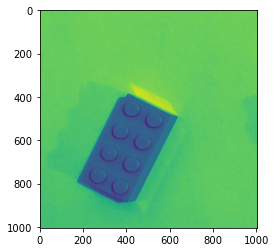

class_pred = 1 (rec)
class_true = 1 (rec)
class probabilities =  [[4.99888233e-01 5.00111767e-01 3.88088302e-12]]


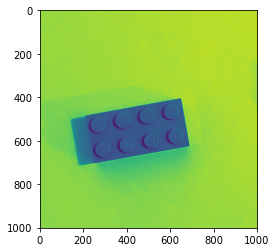

class_pred = 1 (rec)
class_true = 1 (rec)
class probabilities =  [[4.23857646e-09 9.99999989e-01 6.55603036e-09]]


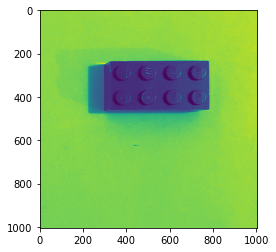

class_pred = 1 (rec)
class_true = 1 (rec)
class probabilities =  [[1.28728226e-20 9.94745919e-01 5.25408129e-03]]


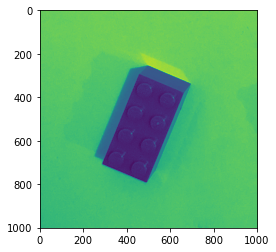

class_pred = 0 (cir)
class_true = 1 (rec)
class probabilities =  [[8.91431545e-01 1.08568455e-01 2.53496353e-15]]


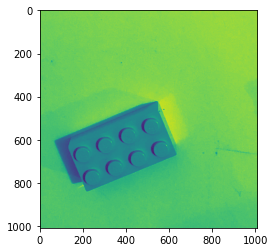

class_pred = 2 (squ)
class_true = 1 (rec)
class probabilities =  [[4.86530929e-10 4.25847265e-01 5.74152734e-01]]


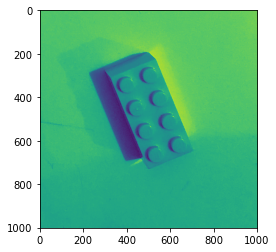

class_pred = 0 (cir)
class_true = 2 (squ)
class probabilities =  [[5.00008148e-01 7.91251638e-06 4.99983939e-01]]


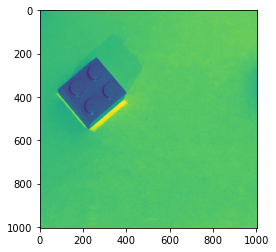

class_pred = 2 (squ)
class_true = 2 (squ)
class probabilities =  [[2.99424723e-06 4.64460282e-01 5.35536723e-01]]


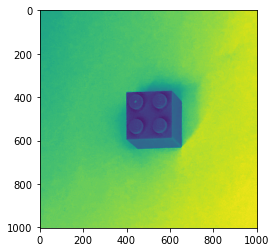

class_pred = 2 (squ)
class_true = 2 (squ)
class probabilities =  [[9.88891448e-03 9.19403970e-05 9.90019145e-01]]


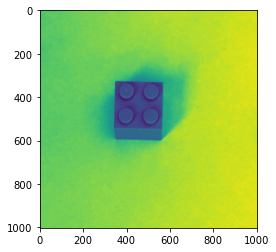

class_pred = 2 (squ)
class_true = 2 (squ)
class probabilities =  [[3.51093358e-03 3.49405000e-07 9.96488717e-01]]


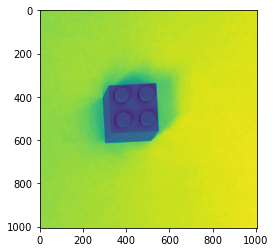

class_pred = 1 (rec)
class_true = 2 (squ)
class probabilities =  [[1.77884145e-08 9.66284340e-01 3.37156420e-02]]


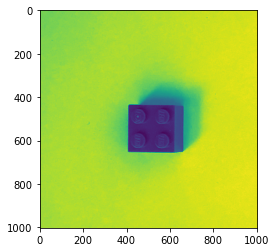

class_pred = 0 (cir)
class_true = 2 (squ)
class probabilities =  [[9.55416804e-01 1.23771692e-06 4.45819580e-02]]


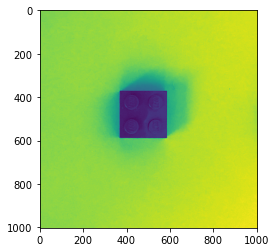

class_pred = 2 (squ)
class_true = 2 (squ)
class probabilities =  [[6.23275518e-03 5.06665102e-10 9.93767244e-01]]


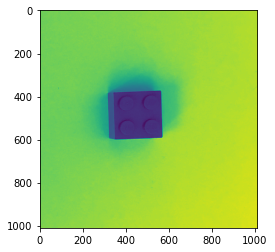

class_pred = 1 (rec)
class_true = 2 (squ)
class probabilities =  [[3.88079399e-09 5.36616108e-01 4.63383888e-01]]


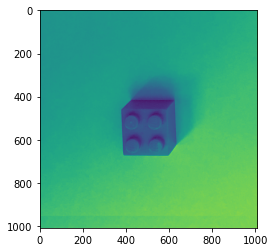

class_pred = 1 (rec)
class_true = 2 (squ)
class probabilities =  [[1.13586146e-01 8.86389075e-01 2.47781566e-05]]


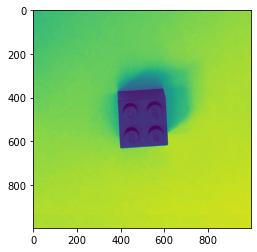

class_pred = 1 (rec)
class_true = 2 (squ)
class probabilities =  [[7.74269424e-05 9.98519079e-01 1.40349372e-03]]


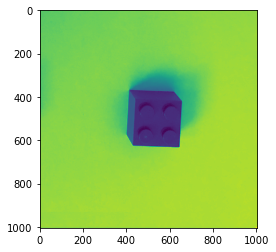

class_pred = 2 (squ)
class_true = 2 (squ)
class probabilities =  [[0.25421207 0.00391444 0.74187349]]


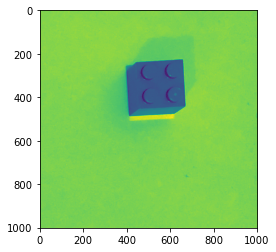

class_pred = 1 (rec)
class_true = 2 (squ)
class probabilities =  [[1.36624942e-16 9.66193650e-01 3.38063497e-02]]


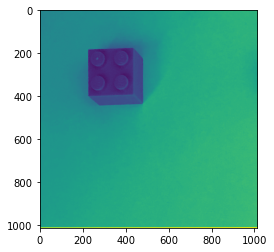

class_pred = 0 (cir)
class_true = 2 (squ)
class probabilities =  [[9.96342324e-01 3.62968527e-03 2.79902979e-05]]


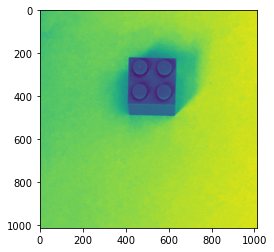

class_pred = 0 (cir)
class_true = 2 (squ)
class probabilities =  [[9.98941142e-01 1.05884980e-03 8.11933788e-09]]


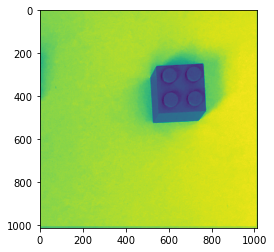

class_pred = 1 (rec)
class_true = 2 (squ)
class probabilities =  [[9.16696881e-08 9.99747521e-01 2.52387589e-04]]


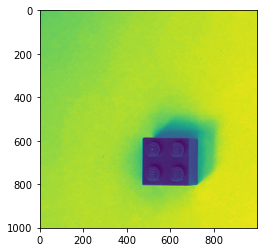

class_pred = 0 (cir)
class_true = 2 (squ)
class probabilities =  [[0.90864116 0.0179599  0.07339894]]


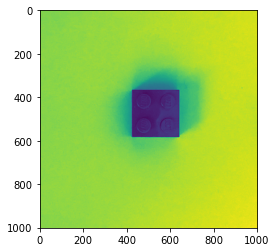

class_pred = 2 (squ)
class_true = 2 (squ)
class probabilities =  [[5.96252930e-08 4.87479186e-10 9.99999940e-01]]


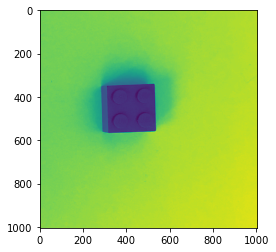

class_pred = 0 (cir)
class_true = 2 (squ)
class probabilities =  [[9.99999987e-01 1.32251946e-08 9.94767255e-11]]


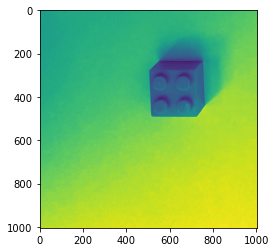

class_pred = 0 (cir)
class_true = 2 (squ)
class probabilities =  [[9.78586249e-01 2.09572067e-02 4.56543771e-04]]


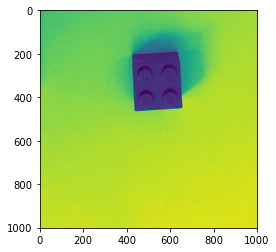

class_pred = 0 (cir)
class_true = 2 (squ)
class probabilities =  [[9.99959990e-01 7.71127980e-08 3.99331526e-05]]


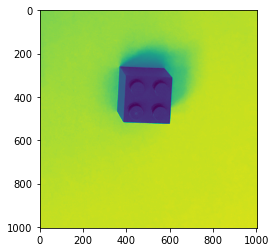

class_pred = 2 (squ)
class_true = 2 (squ)
class probabilities =  [[1.15928745e-03 1.90376436e-07 9.98840522e-01]]


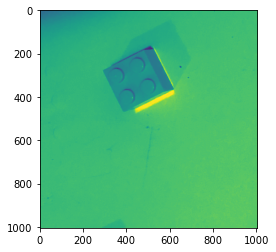

class_pred = 0 (cir)
class_true = 2 (squ)
class probabilities =  [[9.99515905e-01 5.86635570e-07 4.83508542e-04]]


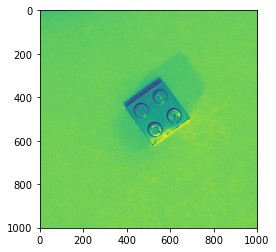

class_pred = 0 (cir)
class_true = 2 (squ)
class probabilities =  [[5.63971517e-01 5.23520360e-06 4.36023248e-01]]


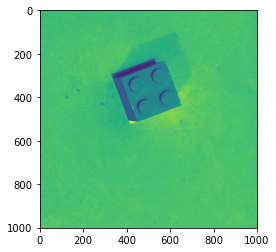

class_pred = 0 (cir)
class_true = 2 (squ)
class probabilities =  [[9.99711062e-01 1.82572905e-17 2.88938146e-04]]


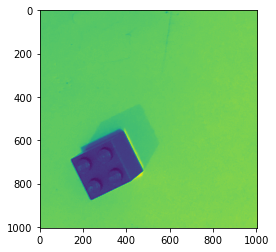

class_pred = 1 (rec)
class_true = 2 (squ)
class probabilities =  [[3.49838173e-04 9.99650162e-01 1.20104991e-16]]


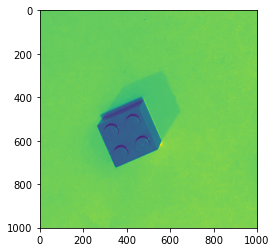

class_pred = 2 (squ)
class_true = 2 (squ)
class probabilities =  [[3.23451808e-10 4.99795020e-01 5.00204980e-01]]


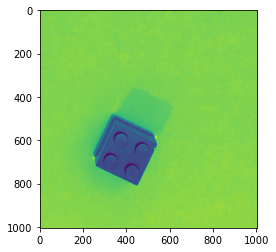

class_pred = 1 (rec)
class_true = 2 (squ)
class probabilities =  [[4.59099356e-06 9.97763335e-01 2.23207422e-03]]


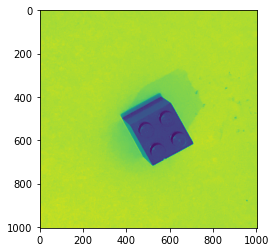

Confusion matrix: 
col_0  0.0  1.0  2.0
row_0               
0.0     12    6    9
1.0      4   18    5
2.0     11    8    8
Accuracy Score: 0.4691358024691358


In [4]:
'''
MODEL TESTING:
    The function 'test_function' will train a model using the default training data, then use the model to predict the class of all images in a directory specified by the path.  
    
    It does this by:
    a) Training a logistic regression model using the above 'TrainLinearModel' function (if no model is provided as a parameter, otherwise we skip this step)
    b) Iterating through each testing image and performing the following:
        1. Loading testing image
        2. Cropping (centered at the center of the original image)
        3. Resizing to LxL pixels (choose L)
        4. Vectorizing the image
        5. Predict the class of image using the model
        6. Determine true class based on filenames (for testing of accuracy only, NOT for predicting)
    c) Printing a classification report of our predictions vs true data
    
    The function is then called once at the end of this cell and will print a classification report of the model tested against the training data.
    
    NOTE: PLEASE ENSUSE THAT EITHER A MODEL IS PROVIDED USING PARAMETER "log_regress=my_model", OR THAT A VALID "training_path" IS SPECIFIED (default "Lego_dataset_2/training" relative to working directory)
'''

# Import cell dependencies
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from PIL import Image

def test_function(path, log_regress=None, training_path="Lego_dataset_2/training", L = 10, measure_accuracy=True, show_each_result=False, show_each_image=False):
    '''
    This function will train a model using the default training data, then use the model to predict the class of all images in a directory specified by the path.  
    
    Parameters:
        path (str): Path to the directy with all data we would like to predict.
        log_regress (sklearn.linear_model.LogisticRegression): Default None. Provide a model if you like. If None is given, test_function will train a model using the training_path and L.
        training_path (str): Default is "Lego_dataset_2/training". Path to the data directory we would use to train our model if no model is given.
        L (int): Default 10. Training resolution of our model. X will contain L^2 values. Lower values provide faster training but retain less raw image data. Low L will be better with less training data to prevent overfitting. Overriden if a model is given.
        measure_accuracy (bool): Default True. This will classify all testing data then provide a confusion matrix and accuracy score. Set this to false if the true classes of test data are unknown and you want to simply want to see prediction results.
        show_each_result (bool): Default False. If true, will print the predict result of each individual case with probabilities.
        show_each_image (bool): Default False. If true, will show the image under predict result for each individual case. Requires show_each_result to be True.
        
    Returns: 
        None (instead prints desired results. Return results can be added if desired)
    '''
    # Get a list of filenames
    filenames = os.listdir(path) 
    classes = ['0', '1', '2']
    classnames = ['cir', 'rec', 'squ']
    
    # Initialize predict and y_test arrays
    predict = np.empty(len(filenames))
    y_test = np.empty(len(filenames))
    
    # Train linear model of size L if no model is given
    if (log_regress is None):
        log_regress = TrainLinearModel(L = L, path=training_path, plot_weights = False)
        
    # NOTE: If a model is given, override L to ensure data testing works
    else:
        # len(coef_[i]) == L^2
        L = int(math.sqrt(len(model.coef_[0])))
        
    print("\nUsing model to predict testing data...")
    
    # Iterate files
    for i in range(len(filenames)):

        # 1. Load training images
        file_path = path + '/' + filenames[i]
        img = Image.open(file_path).convert('L')
        
        # 2. Crop (centered at the center of the original image)
        w, h = img.size
        side = min(w, h)
        img = img.crop((w/2 - side/2, h/2 - side/2, w/2 + side/2, h/2 + side/2))

        # 3. Resize to LxL pixels (choose L)
        img_LxL = img.resize((L, L))
        
        # 4. Vectorize image
        img_arr = np.asarray(img_LxL)
        img_arr = img_arr.ravel().reshape(1, -1)
        
        # 5. Predict class of image using the model
        predict[i] = log_regress.predict(img_arr)
        
        # Measure accuracy. Default is True. Some users may simply want classification with a proven model and unknown data.
        if(measure_accuracy):
            # 5. Determing class based on filename (for accuracy and confusion matrix, NOT for predicting)
            classname = filenames[i][0:3]
            if classname == 'cir': 
                y_test[i] = classes[0]
            elif classname == 'rec': 
                y_test[i] = classes[1]
            elif classname == 'squ': 
                y_test[i] = classes[2]
            else:
                # If a filename is inconclusive, we cannot determing true class and cannot create a confusion matrix
                y_test[i] = -1;
        
        # Output can get very lengthy if we use many test images, so we set this to default off
        if(show_each_result):
            
            # Show the predicted class
            print(f'class_pred = {int(predict[i])} ({classnames[int(predict[i])]})')
            
            # Show the true class if we are measuring accuracy
            if(measure_accuracy): 
                print(f'class_true = {int(y_test[i])} ({classnames[int(y_test[i])]})')  # Only do this if we are measuring accuracy
                
            # Show class confidence probabilities provided by the model
            print('class probabilities = ', log_regress.predict_proba(img_arr))
        
            # If the tester wants to see the image along with result, pass in (show_images=True) to test_function
            if(show_each_image):
                plt.imshow(img)
                plt.show()
    
    # Show confusion matrix and accuracy if we are measuring accuracy. Default is True
    if(measure_accuracy):
        
        # Show the confusion matrix against training data. Should be close to perfect.
        print("Confusion matrix: ")
        print(pd.crosstab(y_test, predict))

        # Show accuracy score. Should be close to perfect.
        print(f"Accuracy Score: {str(accuracy_score(y_test, predict))}")
    
    return

# Calling test_function. This will automatically train a  model using the above TrainLinearModel function (using the default training directory)
test_function(path = 'C:/Users/draym/Desktop/ENGR 418/Project/Lego_dataset_2/testing', L = 10, show_each_result = True, show_each_image = True)

Testing against training data...
Confusion matrix: 
col_0  0.0  1.0  2.0
row_0               
0.0     18    0    0
1.0      0   18    0
2.0      0    0   18
Accuracy Score: 1.0

Using model to predict testing data...
class_pred = 0 (cir)
class probabilities =  [[9.94860577e-01 3.97730764e-06 5.13544540e-03]]


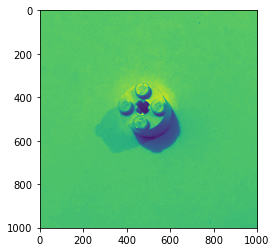

class_pred = 2 (squ)
class probabilities =  [[1.72125664e-02 9.53335417e-06 9.82777900e-01]]


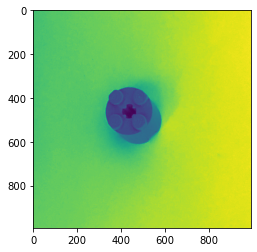

class_pred = 0 (cir)
class probabilities =  [[8.03811195e-01 7.58918159e-07 1.96188046e-01]]


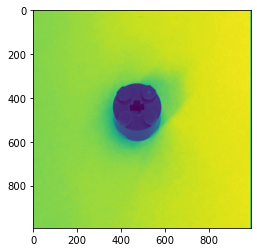

class_pred = 0 (cir)
class probabilities =  [[9.97951680e-01 2.55400802e-04 1.79291928e-03]]


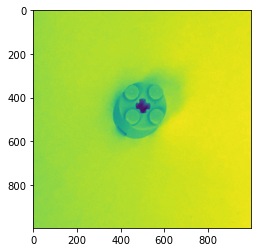

class_pred = 0 (cir)
class probabilities =  [[9.52046718e-01 1.03541708e-05 4.79429282e-02]]


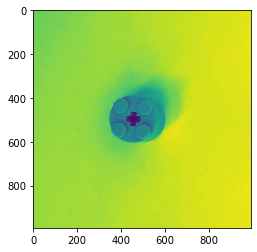

class_pred = 0 (cir)
class probabilities =  [[9.99947377e-01 1.10193303e-08 5.26119934e-05]]


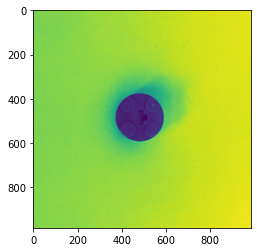

class_pred = 0 (cir)
class probabilities =  [[9.99993430e-01 1.27248436e-08 6.55730586e-06]]


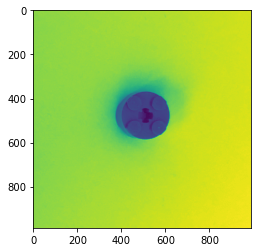

class_pred = 0 (cir)
class probabilities =  [[9.99989753e-01 1.98740967e-06 8.25919147e-06]]


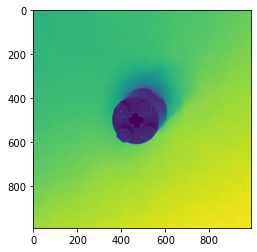

class_pred = 0 (cir)
class probabilities =  [[9.92880588e-01 3.78042447e-07 7.11903365e-03]]


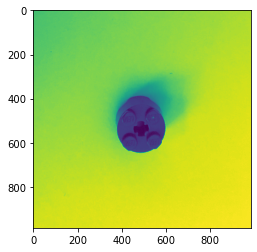

class_pred = 0 (cir)
class probabilities =  [[9.99715200e-01 8.84316371e-05 1.96368303e-04]]


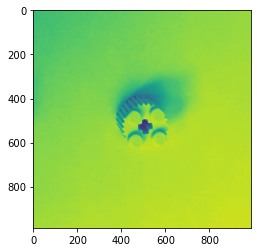

class_pred = 0 (cir)
class probabilities =  [[9.57772159e-01 6.66885686e-07 4.22271742e-02]]


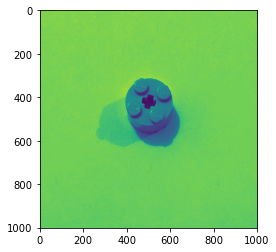

class_pred = 0 (cir)
class probabilities =  [[8.87379513e-01 1.24093801e-08 1.12620475e-01]]


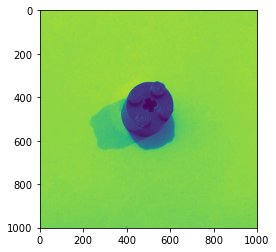

class_pred = 0 (cir)
class probabilities =  [[9.99967302e-01 1.10632896e-10 3.26979319e-05]]


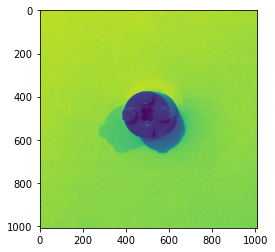

class_pred = 0 (cir)
class probabilities =  [[9.66812671e-01 6.49984178e-10 3.31873279e-02]]


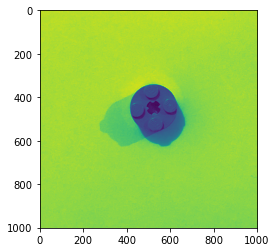

class_pred = 0 (cir)
class probabilities =  [[5.57845236e-01 9.70730412e-06 4.42145057e-01]]


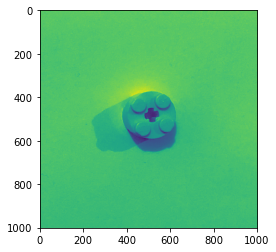

class_pred = 0 (cir)
class probabilities =  [[8.44853716e-01 6.58718459e-09 1.55146277e-01]]


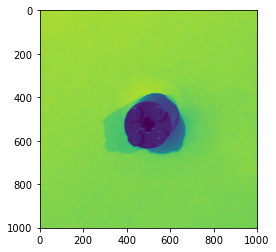

class_pred = 0 (cir)
class probabilities =  [[9.99964720e-01 1.28498305e-09 3.52784562e-05]]


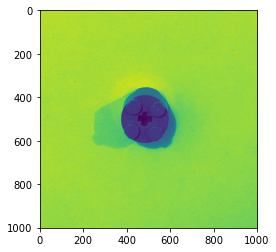

class_pred = 0 (cir)
class probabilities =  [[9.75435897e-01 7.09579470e-10 2.45641027e-02]]


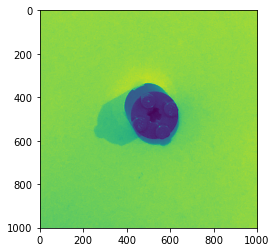

class_pred = 1 (rec)
class probabilities =  [[2.15241879e-15 9.99985687e-01 1.43130290e-05]]


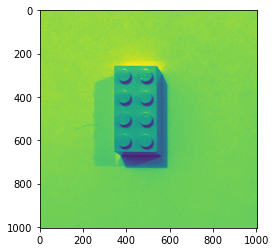

class_pred = 1 (rec)
class probabilities =  [[1.78676329e-10 9.99999996e-01 4.14825748e-09]]


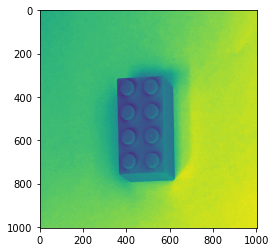

class_pred = 1 (rec)
class probabilities =  [[5.67152587e-12 1.00000000e+00 3.73231370e-13]]


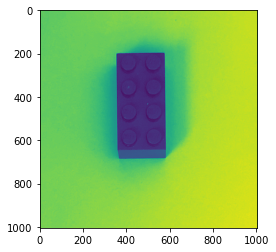

class_pred = 1 (rec)
class probabilities =  [[3.74181985e-20 1.00000000e+00 4.93001774e-12]]


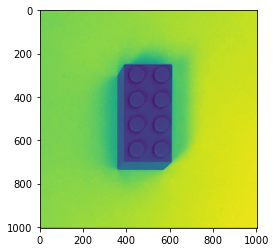

class_pred = 1 (rec)
class probabilities =  [[2.31365029e-12 9.98159522e-01 1.84047838e-03]]


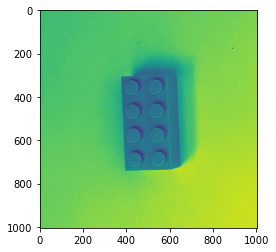

class_pred = 1 (rec)
class probabilities =  [[1.35685589e-14 9.99966932e-01 3.30680306e-05]]


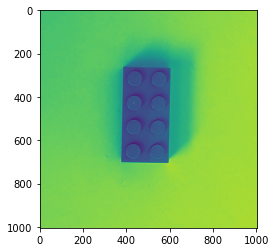

class_pred = 1 (rec)
class probabilities =  [[1.21373466e-26 1.00000000e+00 9.67599401e-20]]


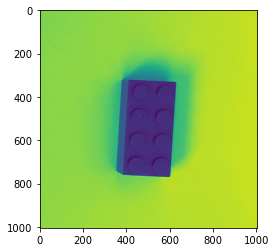

class_pred = 1 (rec)
class probabilities =  [[4.34620310e-17 9.99999998e-01 1.60866894e-09]]


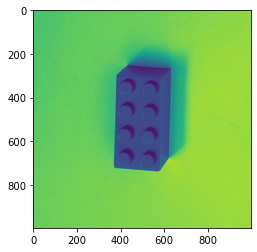

class_pred = 1 (rec)
class probabilities =  [[1.17731010e-22 1.00000000e+00 2.05566669e-16]]


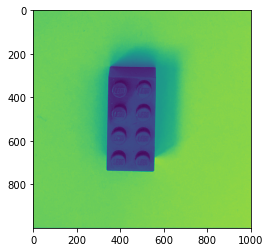

class_pred = 1 (rec)
class probabilities =  [[7.75327086e-05 9.99922467e-01 1.58735086e-10]]


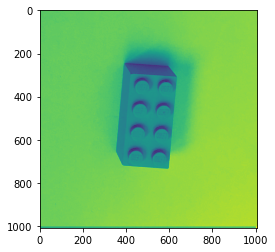

class_pred = 1 (rec)
class probabilities =  [[2.85668923e-16 1.00000000e+00 3.20913776e-17]]


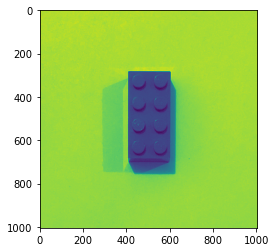

class_pred = 1 (rec)
class probabilities =  [[2.64775517e-16 1.00000000e+00 1.91487765e-26]]


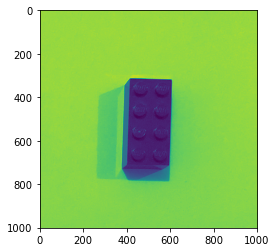

class_pred = 1 (rec)
class probabilities =  [[1.22121600e-12 9.27087777e-01 7.29122226e-02]]


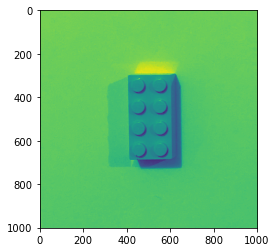

class_pred = 1 (rec)
class probabilities =  [[4.07003414e-12 9.55628562e-01 4.43714381e-02]]


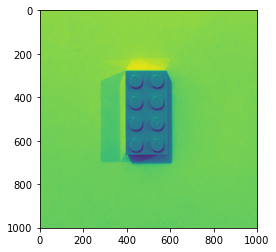

class_pred = 1 (rec)
class probabilities =  [[2.74468620e-03 9.97255314e-01 3.62193363e-11]]


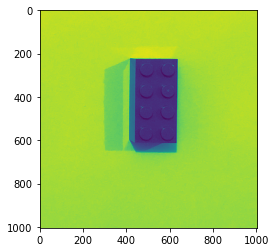

class_pred = 2 (squ)
class probabilities =  [[2.18955916e-10 2.89083876e-01 7.10916124e-01]]


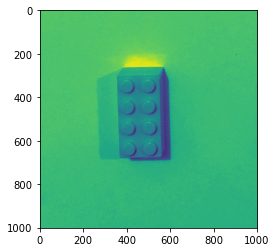

class_pred = 1 (rec)
class probabilities =  [[6.58057932e-18 5.03623792e-01 4.96376208e-01]]


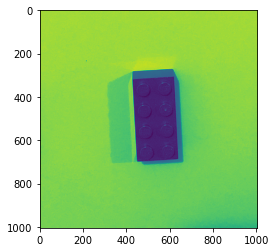

class_pred = 2 (squ)
class probabilities =  [[7.88353052e-21 4.99419137e-01 5.00580863e-01]]


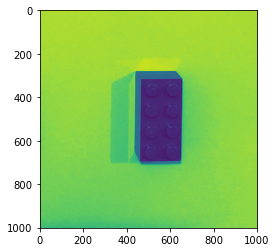

class_pred = 2 (squ)
class probabilities =  [[3.67471084e-10 1.51571794e-09 9.99999998e-01]]


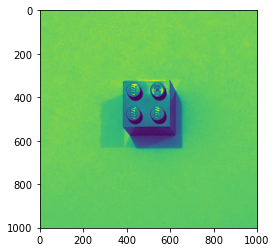

class_pred = 2 (squ)
class probabilities =  [[6.60405360e-05 4.99677776e-06 9.99928963e-01]]


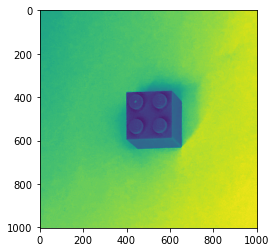

class_pred = 2 (squ)
class probabilities =  [[1.77167168e-06 1.23242489e-04 9.99874986e-01]]


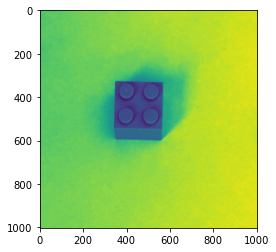

class_pred = 2 (squ)
class probabilities =  [[2.39310959e-09 3.48726082e-07 9.99999649e-01]]


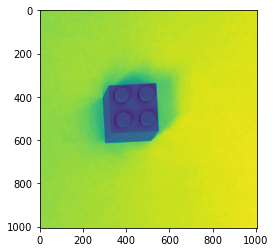

class_pred = 2 (squ)
class probabilities =  [[2.28973566e-09 1.51870169e-06 9.99998479e-01]]


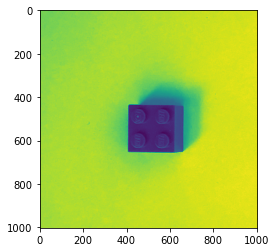

class_pred = 2 (squ)
class probabilities =  [[4.66080189e-03 2.27766919e-07 9.95338970e-01]]


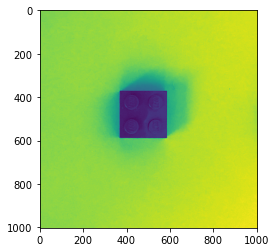

class_pred = 2 (squ)
class probabilities =  [[6.40848149e-06 2.27069100e-09 9.99993589e-01]]


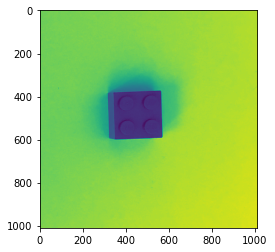

class_pred = 2 (squ)
class probabilities =  [[4.40705840e-03 4.07298315e-04 9.95185643e-01]]


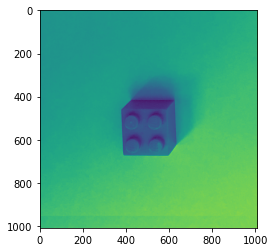

class_pred = 2 (squ)
class probabilities =  [[1.52667974e-03 1.09254594e-06 9.98472228e-01]]


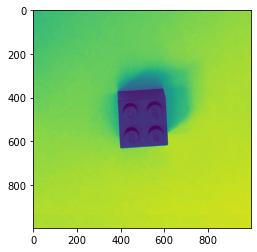

class_pred = 2 (squ)
class probabilities =  [[5.85547732e-06 1.45487663e-09 9.99994143e-01]]


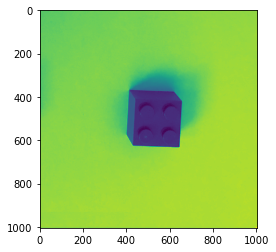

class_pred = 2 (squ)
class probabilities =  [[1.26858072e-06 2.53690383e-05 9.99973362e-01]]


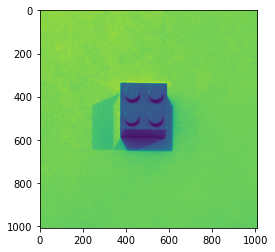

class_pred = 2 (squ)
class probabilities =  [[5.79292913e-07 1.28716798e-07 9.99999292e-01]]


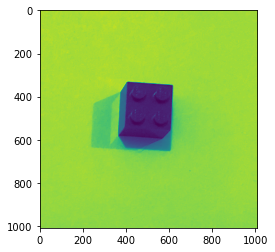

class_pred = 2 (squ)
class probabilities =  [[4.63969268e-06 1.30333599e-09 9.99995359e-01]]


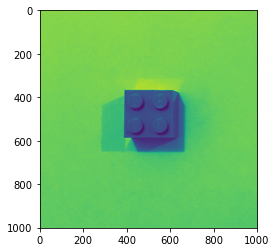

class_pred = 2 (squ)
class probabilities =  [[1.90154657e-02 1.57010333e-09 9.80984533e-01]]


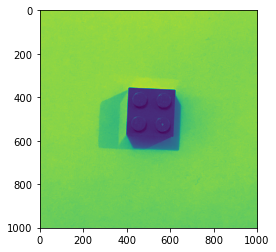

class_pred = 2 (squ)
class probabilities =  [[1.12462081e-03 1.36790185e-07 9.98875242e-01]]


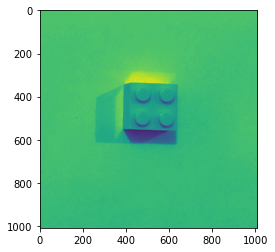

class_pred = 2 (squ)
class probabilities =  [[1.48460454e-05 7.35648837e-10 9.99985153e-01]]


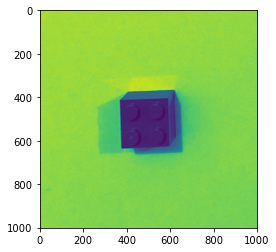

class_pred = 0 (cir)
class probabilities =  [[0.55360868 0.00366327 0.44272805]]


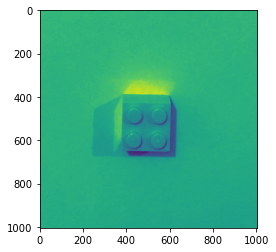

class_pred = 2 (squ)
class probabilities =  [[4.49512523e-03 2.75832223e-08 9.95504847e-01]]


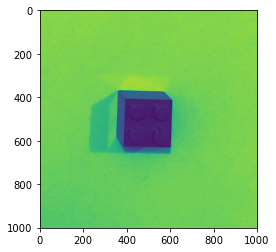

In [3]:
# Example of test_function with measure_accuracy = False. This basically emulates a production use of the model to predict a set of "true class unknown" data. This will train a model as none is given.
test_function(path = 'C:/Users/draym/Desktop/ENGR 418/Project/Lego_dataset_2/testing', L = 10, measure_accuracy=False, show_each_result = True, show_each_image = True)

In [4]:
# Example of test_function with log_regress given. This will not train a model and will adjust L to work with the given model (from cell 1). L is provided as 100 here, but will readjust to the L used for our provided model.
test_function(path = 'C:/Users/draym/Desktop/ENGR 418/Project/Lego_dataset_2/testing', log_regress = model, L = 100, measure_accuracy=True, show_each_result = False, show_each_image = False)


Using model to predict testing data...
Confusion matrix: 
col_0  0.0  1.0  2.0
row_0               
0.0     17    0    1
1.0      0   16    2
2.0      1    0   17
Accuracy Score: 0.9259259259259259


In [5]:
# Example of test_function with training path provided and all parameters specified. This will train using the given training data path.
test_function(path = 'C:/Users/draym/Desktop/ENGR 418/Project/Lego_dataset_2/testing', log_regress = None, training_path = "Lego_dataset_2/training", L = 20, measure_accuracy = True, show_each_result = False, show_each_image = False)

Testing against training data...
Confusion matrix: 
col_0  0.0  1.0  2.0
row_0               
0.0     18    0    0
1.0      0   18    0
2.0      0    0   18
Accuracy Score: 1.0

Using model to predict testing data...
Confusion matrix: 
col_0  0.0  1.0  2.0
row_0               
0.0     16    0    2
1.0      0   16    2
2.0      2    0   16
Accuracy Score: 0.8888888888888888
